In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
img = mpimg.imread("images.jpg")

In [5]:
print("Shape:", img.shape)
print("Min pixel value:", img.min())
print("Max pixel value:", img.max())


Shape: (225, 225, 3)
Min pixel value: 0
Max pixel value: 255


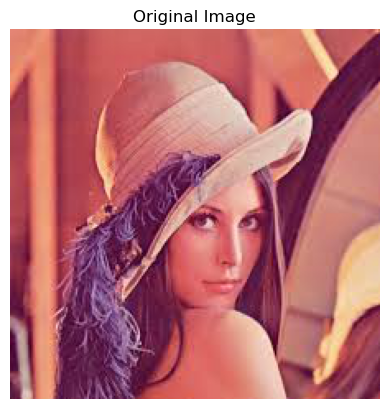

In [6]:
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

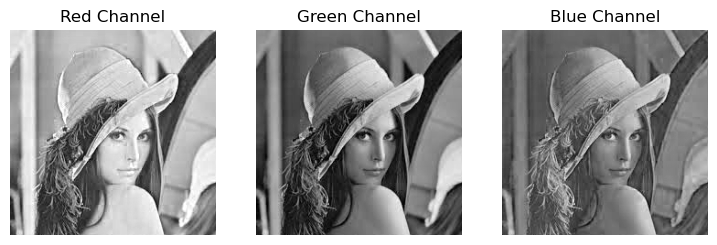

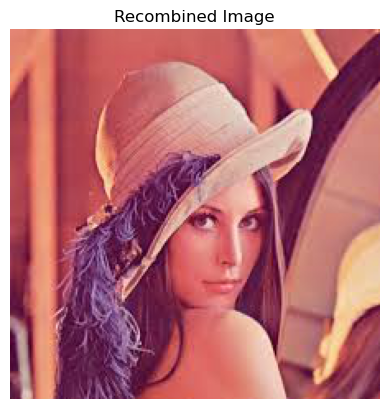

In [7]:
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.imshow(R, cmap='gray')
plt.title("Red Channel")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(G, cmap='gray')
plt.title("Green Channel")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(B, cmap='gray')
plt.title("Blue Channel")
plt.axis("off")

plt.show()

recombined = np.stack([R, G, B], axis=-1)

plt.imshow(recombined)
plt.title("Recombined Image")
plt.axis("off")
plt.show()

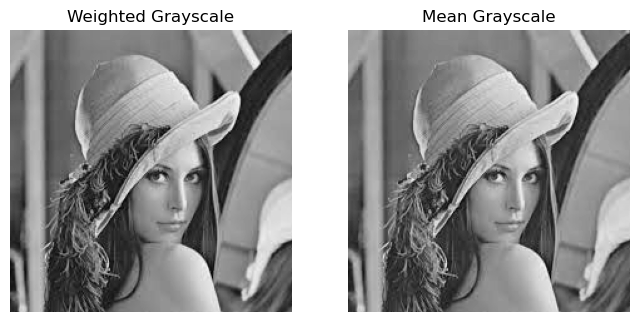

In [8]:
gray_weighted = 0.299*R + 0.587*G + 0.114*B
gray_mean = np.mean(img, axis=2)

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(gray_weighted, cmap='gray')
plt.title("Weighted Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gray_mean, cmap='gray')
plt.title("Mean Grayscale")
plt.axis("off")

plt.show()

In [9]:
img_small = np.array([
    [[1,0,0],[0,1,0],[0,0,1]],
    [[1,1,0],[0,1,1],[1,0,1]],
    [[0.5,0.5,0.5],[1,1,1],[0,0,0]]
])

for i in range(3):
    for j in range(3):
        print(f"Pixel ({i},{j}): RGB = {img_small[i,j]}")


Pixel (0,0): RGB = [1. 0. 0.]
Pixel (0,1): RGB = [0. 1. 0.]
Pixel (0,2): RGB = [0. 0. 1.]
Pixel (1,0): RGB = [1. 1. 0.]
Pixel (1,1): RGB = [0. 1. 1.]
Pixel (1,2): RGB = [1. 0. 1.]
Pixel (2,0): RGB = [0.5 0.5 0.5]
Pixel (2,1): RGB = [1. 1. 1.]
Pixel (2,2): RGB = [0. 0. 0.]


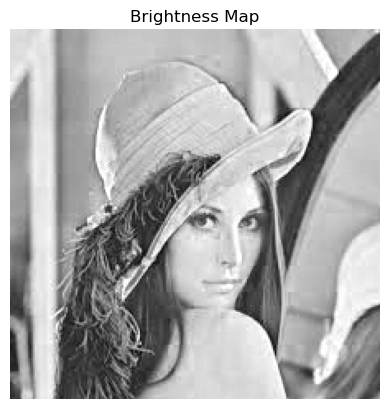

In [10]:
def brightness(img):
    return np.max(img, axis=2)

bright_map = brightness(img)

plt.imshow(bright_map, cmap='gray')
plt.title("Brightness Map")
plt.axis("off")
plt.show()


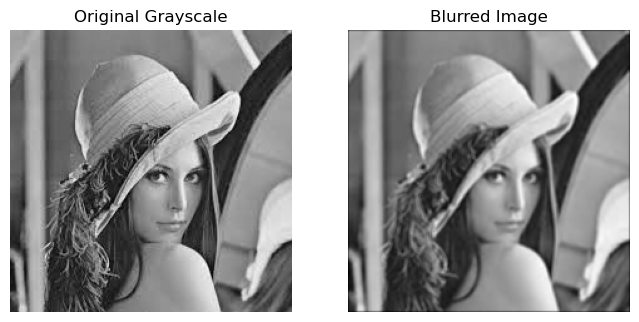

In [11]:
def blur_gray(img):
    kernel = np.ones((3,3)) / 9
    padded = np.pad(img, pad_width=1, mode='constant', constant_values=0)
    
    h, w = img.shape
    output = np.zeros((h, w))
    
    for i in range(h):
        for j in range(w):
            region = padded[i:i+3, j:j+3]
            output[i, j] = np.sum(region * kernel)
    
    return output

blurred = blur_gray(gray_weighted)

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(gray_weighted, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(blurred, cmap='gray')
plt.title("Blurred Image")
plt.axis("off")

plt.show()


1. What does a convolution kernel do?
It combines a pixel with its neighbors to extract features or apply effects like blur, sharpen, or edge detection.

2. How does changing the kernel affect the output?
Different kernels emphasize different features (smoothing, edges, textures).

3. Why does grayscale use weighted averages instead of a simple mean?
Because human vision is more sensitive to green, then red, and least to blue—weights match human perception.